In [1]:
!nvidia-smi

Wed Mar 11 10:45:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from torchvision import models

In [11]:
path = untar_data(URLs.FOOD)
train_path = path/'train.txt'
test_path = path/'test.txt'

In [12]:
def filelist2df(path):
    df = pd.read_csv(path, delimiter='/', header=None, names=['label', 'name'])
    df['name'] =  df['label'].astype(str) + "/" + df['name'].astype(str) + ".jpg"
    return df

In [13]:
train_df = filelist2df(train_path)
test_df = filelist2df(test_path)

In [14]:
food = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_x = ColReader(1,pref=path/'images'),
                 splitter = RandomSplitter(),
                 get_y = ColReader(cols=0),
                 item_tfms=Resize(224),
                 batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
                 )

In [15]:
food.summary(train_df.values)

Setting-up type transforms pipelines
 ['apple_pie' 'apple_pie/1014775.jpg']
 ['apple_pie' 'apple_pie/1026328.jpg']
 ...
 ['waffles' 'waffles/982668.jpg']
 ['waffles' 'waffles/995085.jpg']
 ['waffles' 'waffles/999047.jpg']]
Found 75750 items
2 datasets of sizes 60600,15150
Setting up Pipeline: ColReader -> PILBase.create
Setting up Pipeline: ColReader -> Categorize

Building one sample
  Pipeline: ColReader -> PILBase.create
    starting from
      ['bruschetta' 'bruschetta/1136794.jpg']
    applying ColReader gives
      /home/jupyter/.fastai/data/food-101/images/bruschetta/1136794.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=512x512
  Pipeline: ColReader -> Categorize
    starting from
      ['bruschetta' 'bruschetta/1136794.jpg']
    applying ColReader gives
      bruschetta
    applying Categorize gives
      TensorCategory(10)

Final sample: (PILImage mode=RGB size=512x512, TensorCategory(10))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up be

In [72]:
dls = food.dataloaders(train_df.values,bs=64)

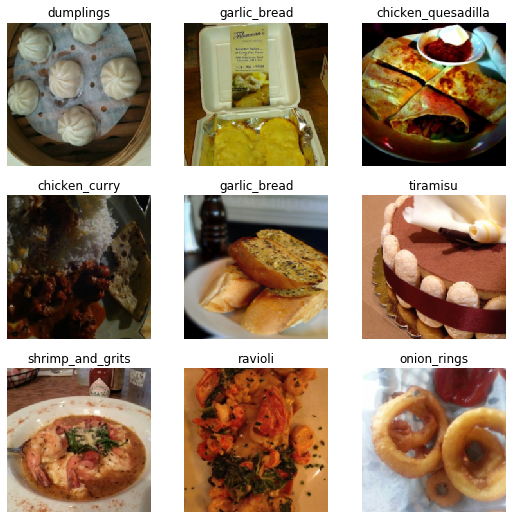

In [73]:
dls.show_batch()

In [75]:
learn = cnn_learner(dls, models.resnet152, metrics=accuracy)

In [ ]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.744902,1.368027,0.644026,10:06
1,1.441513,1.176056,0.693003,10:05
